<a href="https://colab.research.google.com/github/Aditya-Shandilya1182/RUL_prediction/blob/main/project_codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [ ]:
index_names = ['unit_number', 'time_cycles']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = ['s_{}'.format(i+1) for i in range(0,21)]
col_names = index_names + setting_names + sensor_names

In [ ]:
train = pd.read_csv('../input/nasa-cmaps/CMaps/train_FD001.txt',sep='\s+',header=None,index_col=False,names=col_names)
X_test = pd.read_csv('../input/nasa-cmaps/CMaps/test_FD001.txt',sep='\s+',header=None,index_col=False,names=col_names)
y_test = pd.read_csv('../input/nasa-cmaps/CMaps/RUL_FD001.txt',sep='\s+',header=None,index_col=False,names=['RUL'])

In [ ]:
def add_RUL_column(df):
    train_grouped_by_unit = df.groupby(by='unit_number')
    max_time_cycles = train_grouped_by_unit['time_cycles'].max()
    merged = df.merge(max_time_cycles.to_frame(name='max_time_cycle'), left_on='unit_number',right_index=True)
    merged["RUL"] = merged["max_time_cycle"] - merged['time_cycles']
    merged = merged.drop("max_time_cycle", axis=1)
    return merged

In [ ]:
train = add_RUL_column(train)

In [ ]:
Sensor_dictionary={}
dict_list=[ "Fan inlet temperature (◦R)",
"LPC outlet temperature (◦R)",
"HPC outlet temperature (◦R)",
"LPT outlet temperature (◦R)",
"Fan inlet Pressure (psia)",
"bypass-duct pressure (psia)",
"HPC outlet pressure (psia)",
"Physical fan speed (rpm)",
"Physical core speed (rpm)",
"Engine pressure ratio (P50/P2)",
"HPC outlet Static pressure (psia)",
"Ratio of fuel flow to Ps30 (pps/psia)",
"Corrected fan speed (rpm)",
"Corrected core speed (rpm)",
"Bypass Ratio ",
"Burner fuel-air ratio",
"Bleed Enthalpy",
"Required fan speed",
"Required fan conversion speed",
"High-pressure turbines Cool air flow",
"Low-pressure turbines Cool air flow" ]
i=1
for x in dict_list :
    Sensor_dictionary['s_'+str(i)]=x
    i+=1
Sensor_dictionary

{'s_1': 'Fan inlet temperature (◦R)',
 's_2': 'LPC outlet temperature (◦R)',
 's_3': 'HPC outlet temperature (◦R)',
 's_4': 'LPT outlet temperature (◦R)',
 's_5': 'Fan inlet Pressure (psia)',
 's_6': 'bypass-duct pressure (psia)',
 's_7': 'HPC outlet pressure (psia)',
 's_8': 'Physical fan speed (rpm)',
 's_9': 'Physical core speed (rpm)',
 's_10': 'Engine pressure ratio (P50/P2)',
 's_11': 'HPC outlet Static pressure (psia)',
 's_12': 'Ratio of fuel flow to Ps30 (pps/psia)',
 's_13': 'Corrected fan speed (rpm)',
 's_14': 'Corrected core speed (rpm)',
 's_15': 'Bypass Ratio ',
 's_16': 'Burner fuel-air ratio',
 's_17': 'Bleed Enthalpy',
 's_18': 'Required fan speed',
 's_19': 'Required fan conversion speed',
 's_20': 'High-pressure turbines Cool air flow',
 's_21': 'Low-pressure turbines Cool air flow'}

In [ ]:
def plot_signal(df, Sensor_dic, signal_name):
    plt.figure(figsize=(13,5))
    for i in df['unit_number'].unique():
        plt.plot('RUL', signal_name, data=df[df['unit_number']==i].rolling(10).mean())

    plt.xlim(250, 0)
    plt.xticks(np.arange(0, 300, 25))
    plt.ylabel(Sensor_dic[signal_name])
    plt.xlabel('Remaining Useful Life')
    plt.savefig(Sensor_dic[signal_name], dpi=300, bbox_inches="tight")
    plt.show()

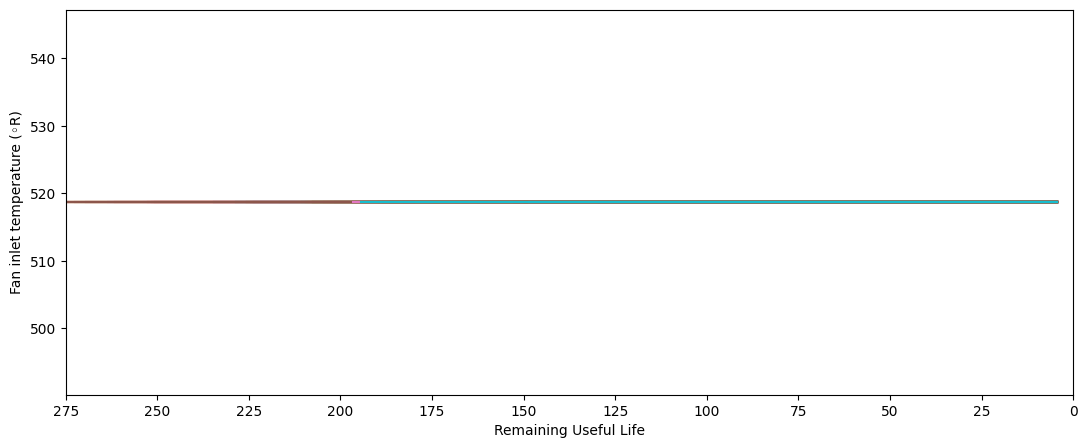

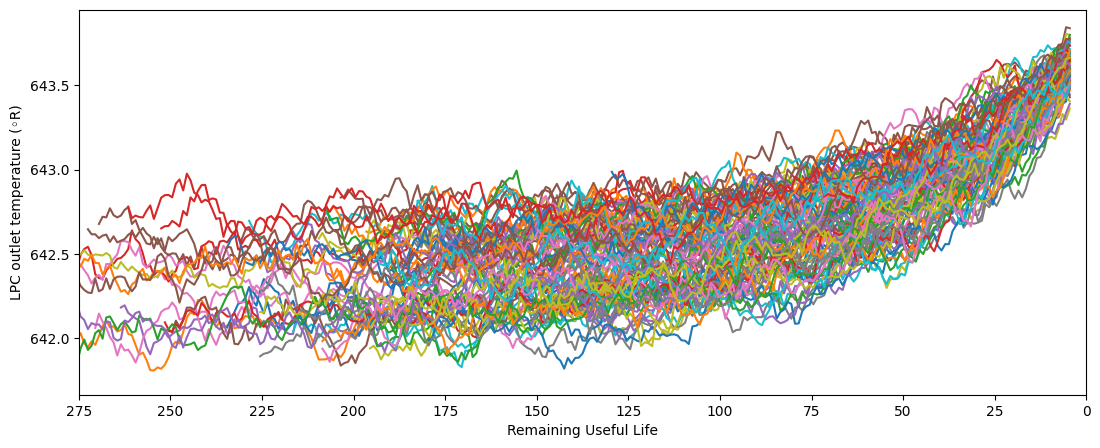

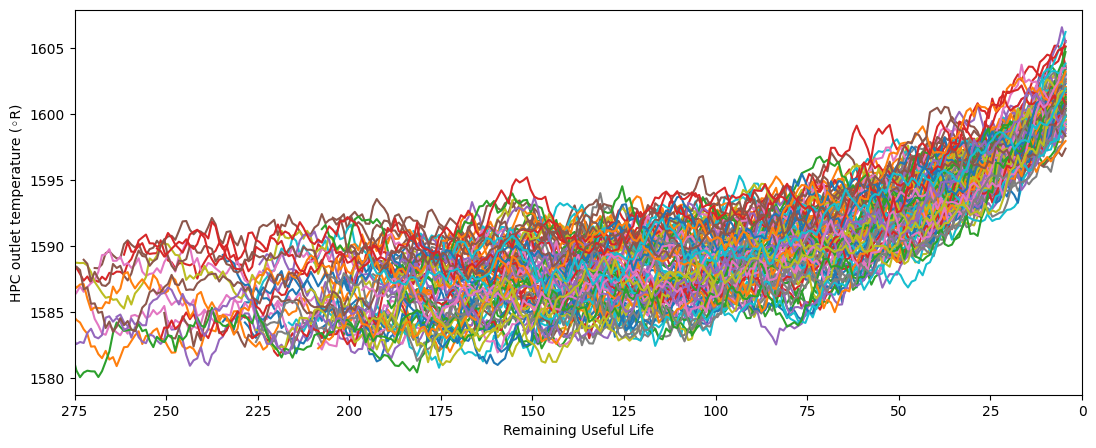

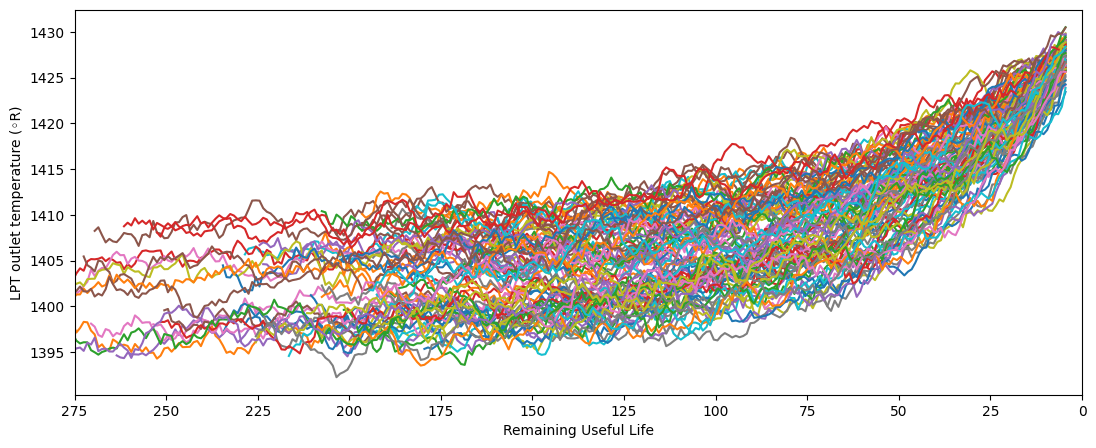

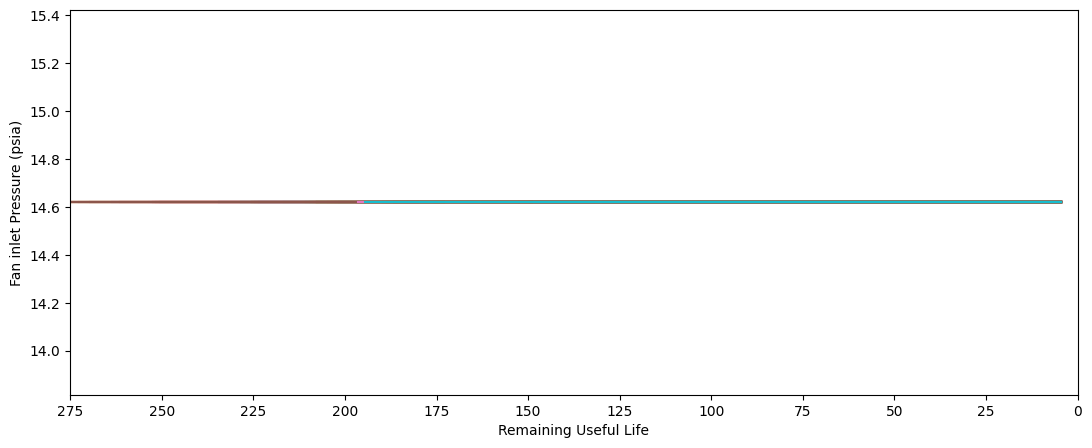

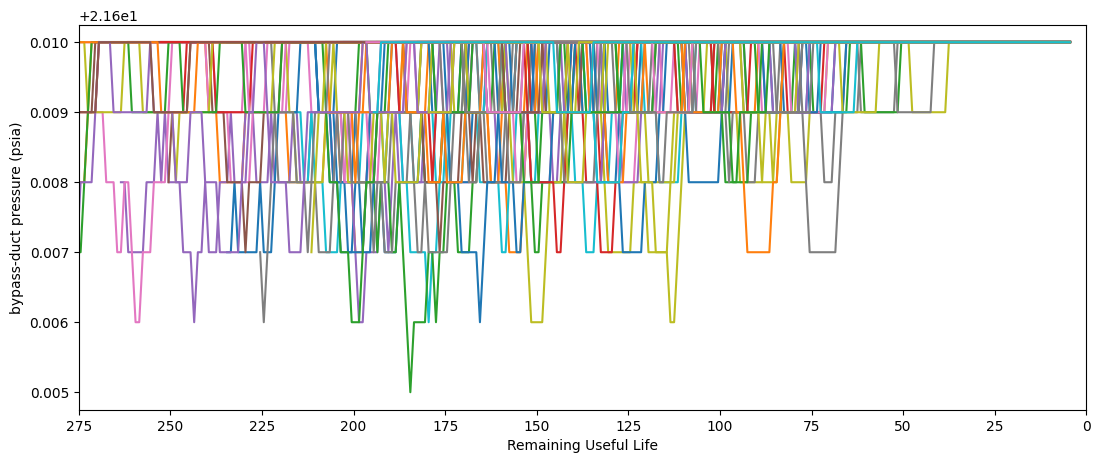

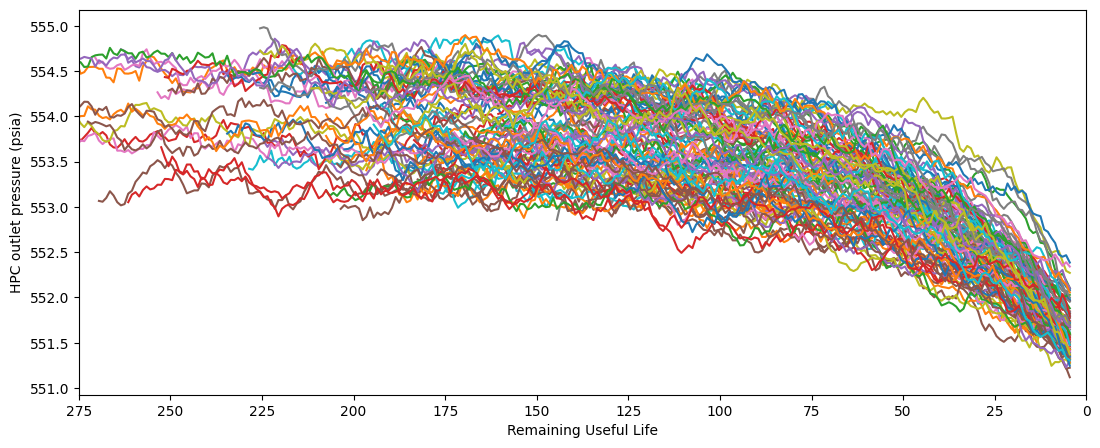

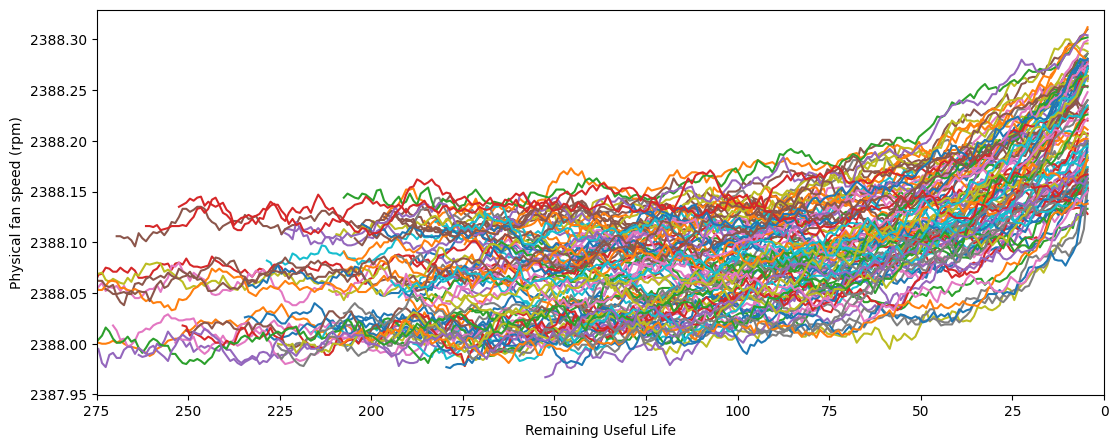

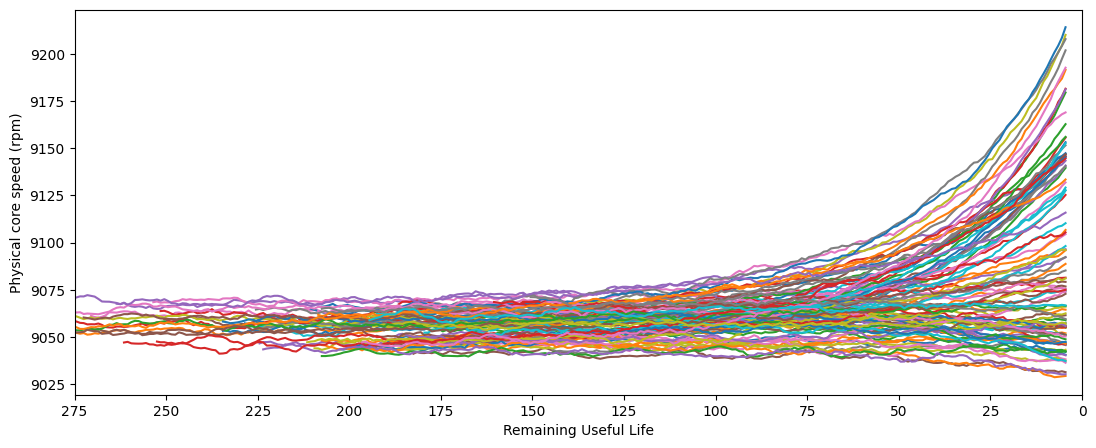

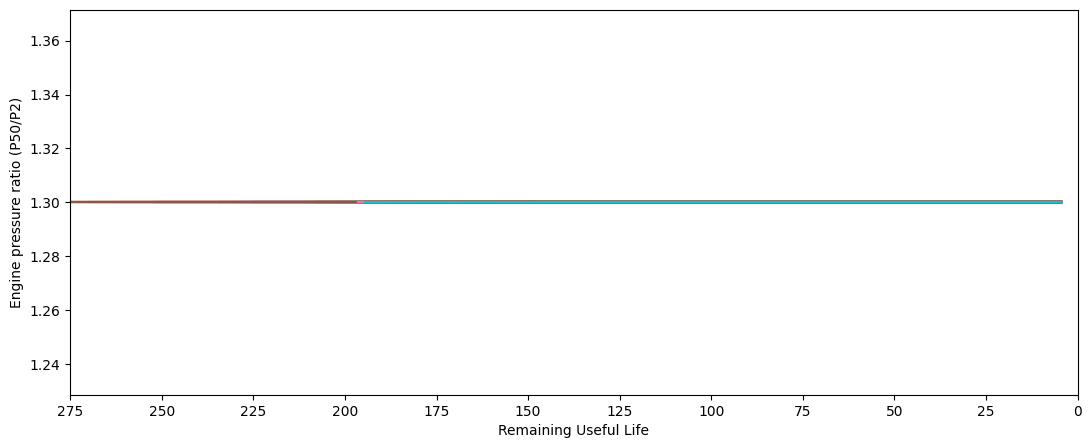

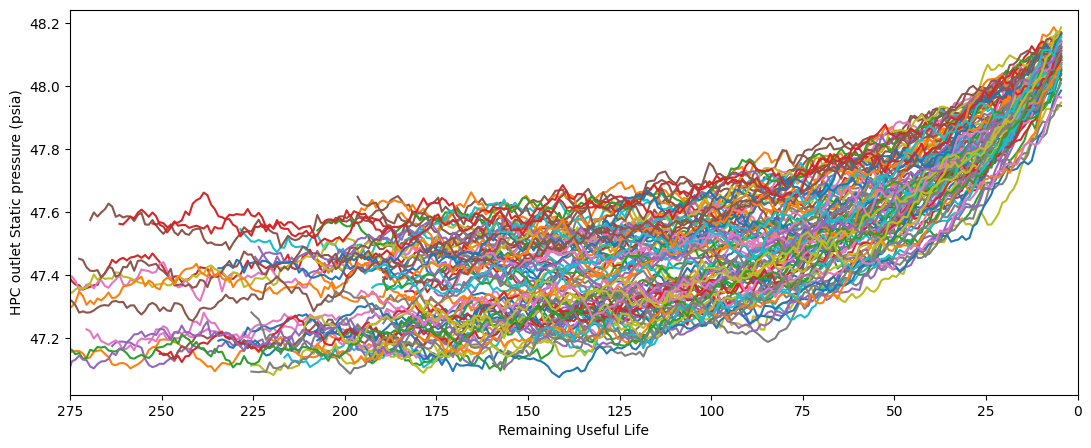

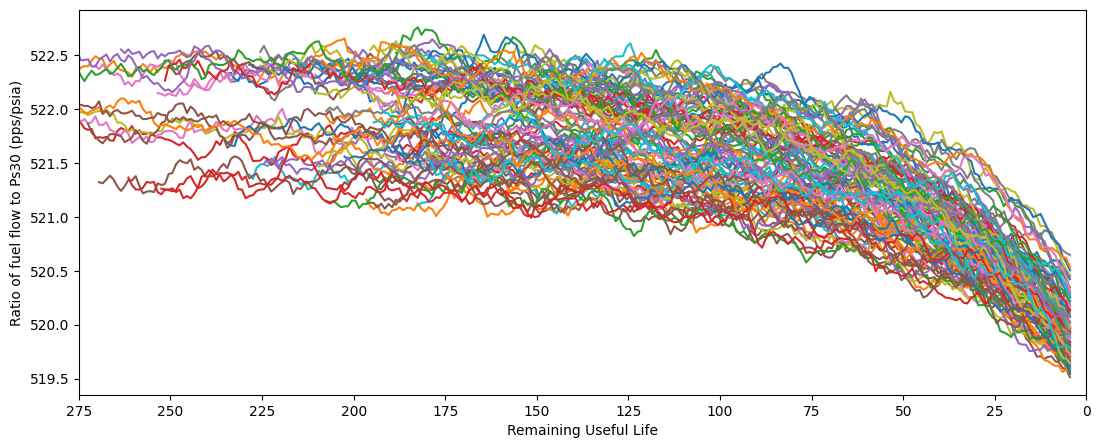

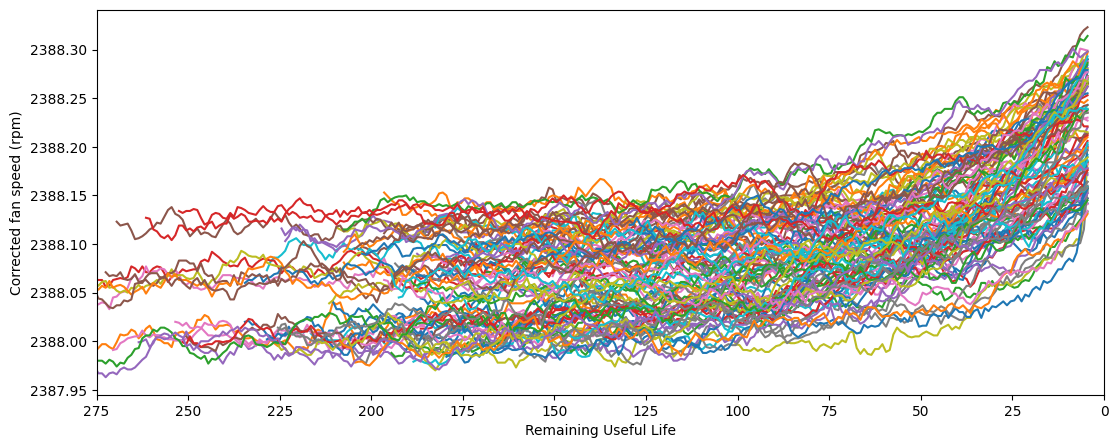

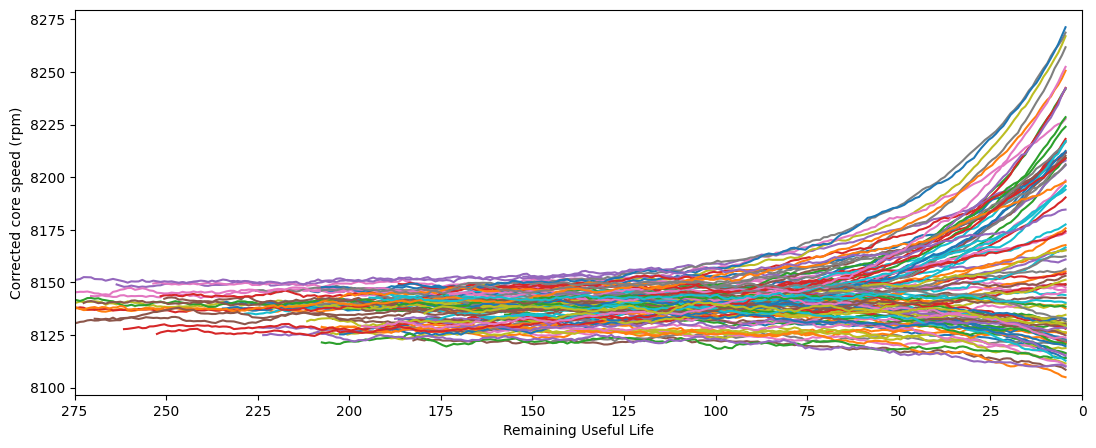

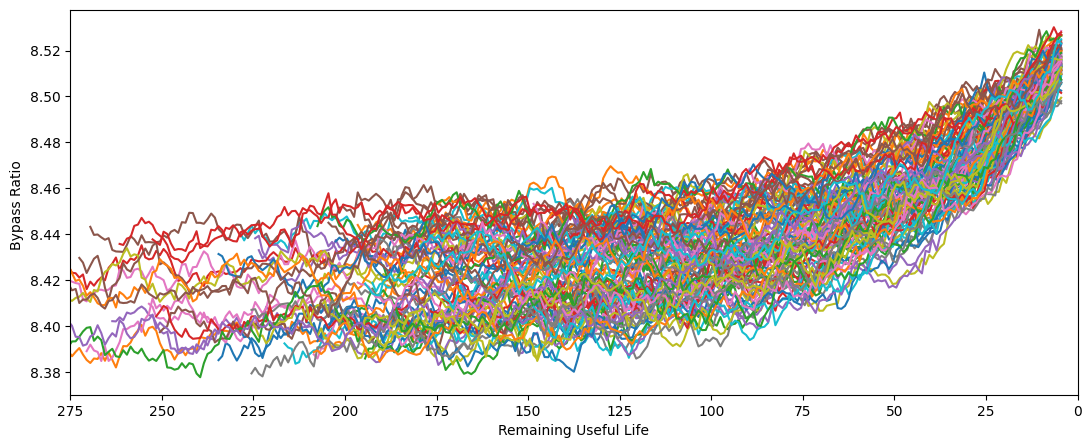

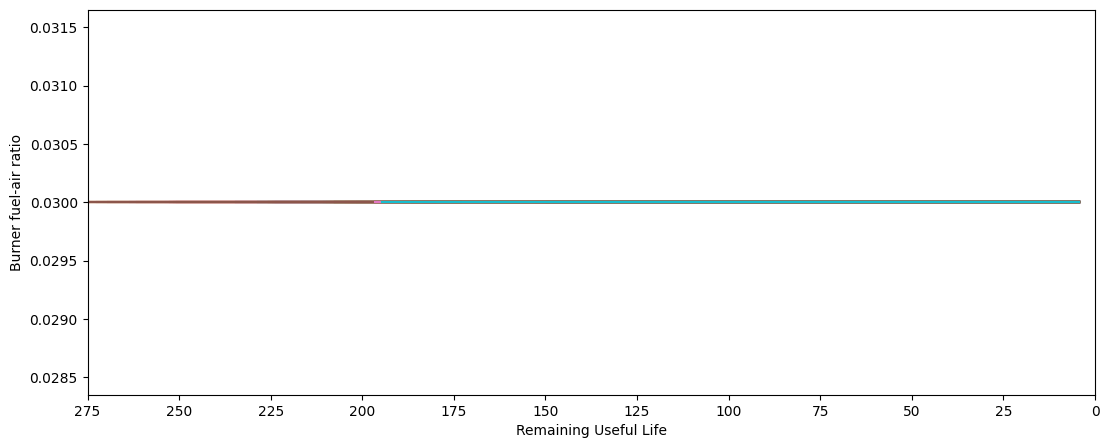

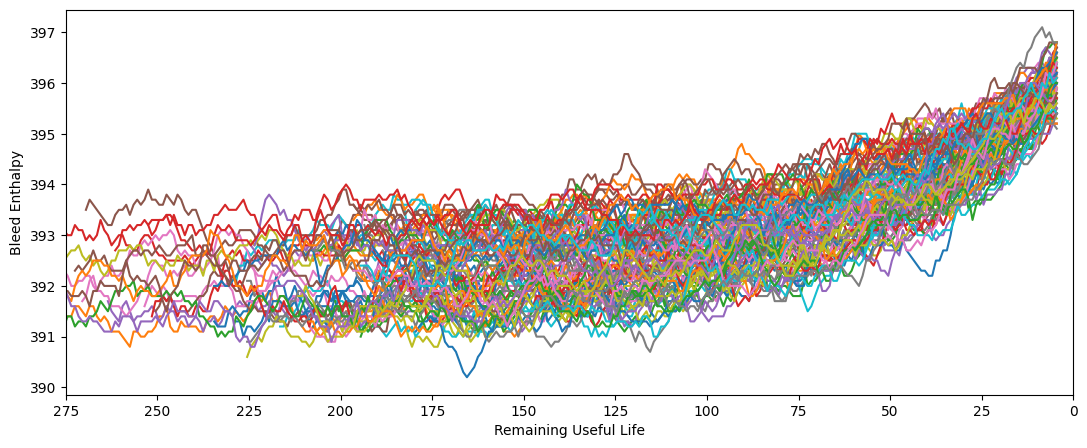

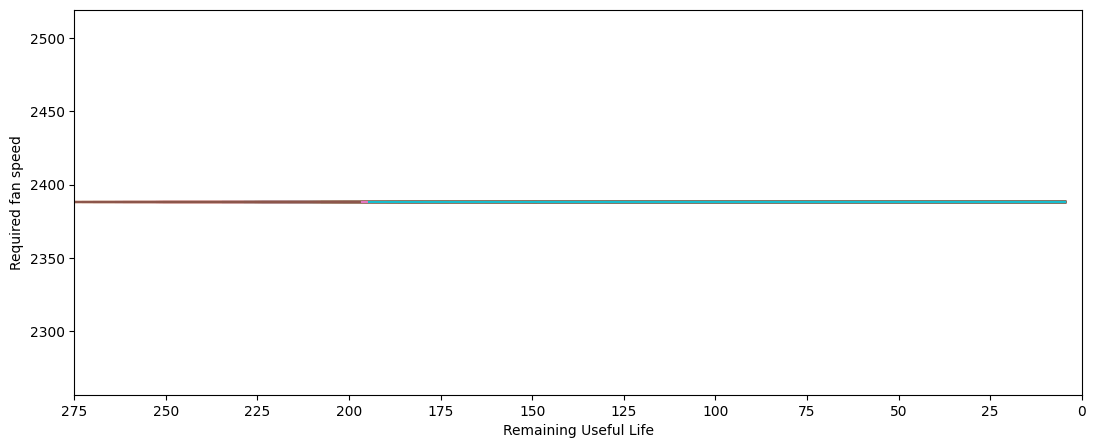

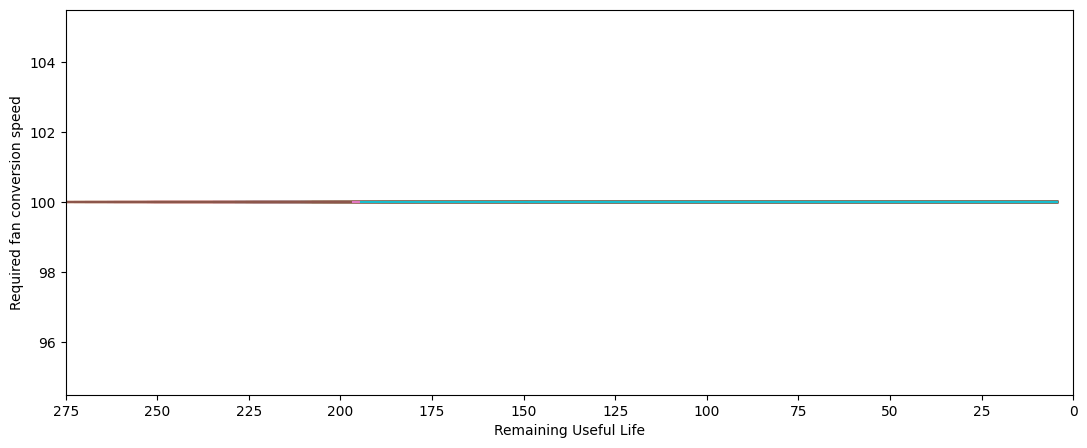

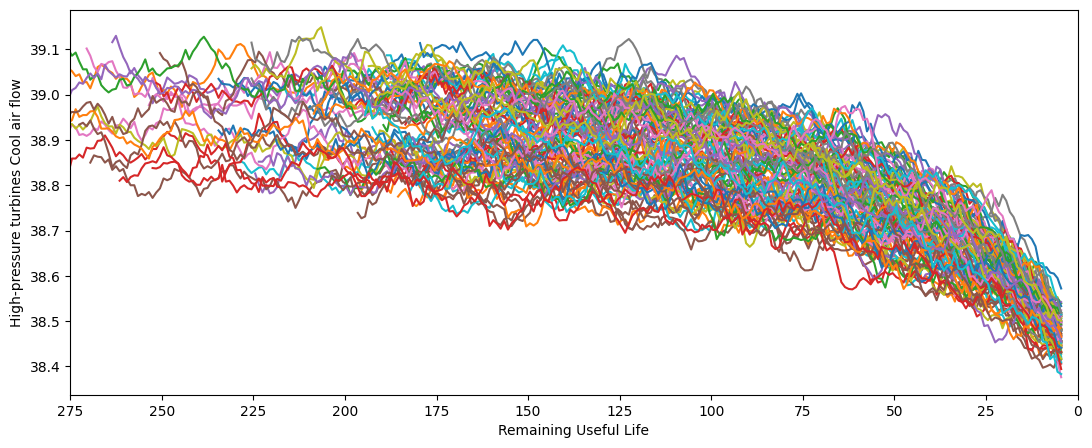

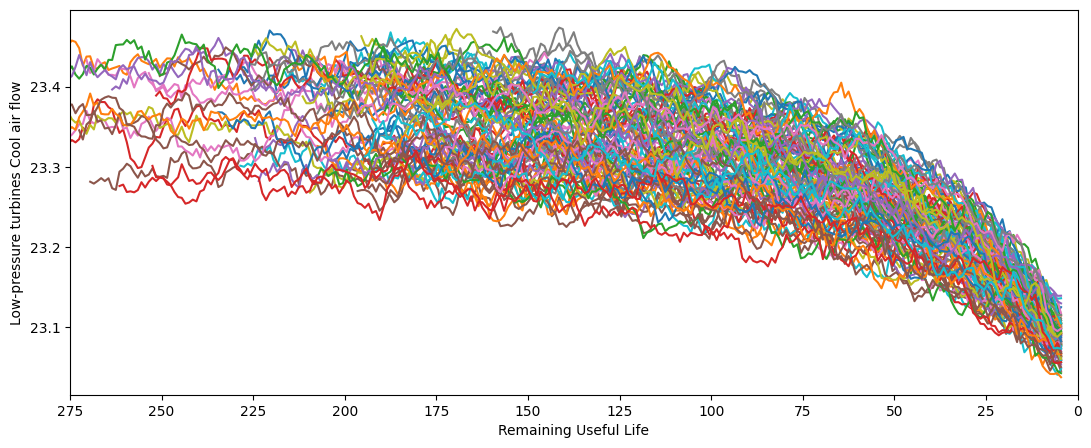

In [ ]:
for i in range(1,22):
    try:
        plot_signal(train, Sensor_dictionary,'s_'+str(i))
    except:
        pass